## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 160 kB 5.3 MB/s 


In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Variáveis de Decisão
3.   Operadores



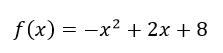

In [3]:
# Função Objetivo
def objective_function(individual):
  return (-individual[0]**2 + 2*individual[0] + 8), 

In [4]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo); peso positivo = maximização
creator.create("Individual", list,  fitness=creator.FitnessMax)   # indivíduo

URL com todas as informações sobre a biblioteca: 

https://deap.readthedocs.io/en/master/api/tools.html

In [6]:
toolbox = base.Toolbox()

# Gerador de atributos inteiros: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("gerador_nums", random.uniform, -10, 10)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gerador_nums, 1)   # 1: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [7]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selRoulette)

In [8]:
pop = toolbox.population(n=50)                            # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

## Otimização

In [11]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0, mutpb=0.1, ngen=20, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std    	min     	max    
0  	50    	-23.9657	34.4367	-100.962	8.99843
1  	4     	8.99843 	1.77636e-15	8.99843 	8.99843
2  	4     	8.99843 	1.77636e-15	8.99843 	8.99843
3  	3     	8.99843 	1.77636e-15	8.99843 	8.99843
4  	7     	8.99843 	1.77636e-15	8.99843 	8.99843
5  	7     	8.99342 	0.0262393  	8.8265  	8.99843
6  	3     	8.9856  	0.0695486  	8.52883 	8.99843
7  	5     	8.98903 	0.0657439  	8.52883 	8.99843
8  	9     	8.99843 	1.77636e-15	8.99843 	8.99843
9  	7     	8.99843 	1.77636e-15	8.99843 	8.99843
10 	4     	8.99831 	0.000797788	8.99273 	8.99843
11 	6     	8.9982  	0.00111667 	8.99273 	8.99843
12 	6     	8.97238 	0.144557   	8.0027  	8.99843
13 	5     	8.94667 	0.201171   	8.0027  	8.99843
14 	9     	8.9667  	0.149372   	8.0027  	8.99843
15 	5     	8.96889 	0.0886066  	8.70307 	8.99843
16 	5     	8.9748  	0.0801279  	8.70307 	8.99843
17 	8     	8.88333 	0.606596   	4.68031 	8.99843
18 	4     	8.88253 	0.606806   	4.68031 	8.99843
19 	5     	8.98071 	0.070143

## Resultados

In [13]:
# 5 soluções da última geração
import pandas as pd
pd.DataFrame(pop).head(5)

,0
0,1.039663
1,1.039663
2,1.039663
3,1.039663
4,1.544911


In [15]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[1.039663475758939]
Melhor Resultado da Função Objetivo:


(8.99842680869072,)

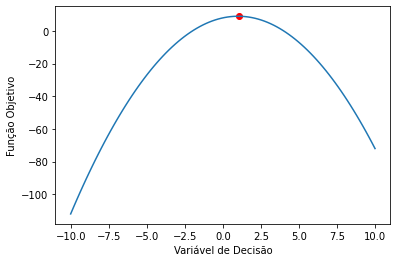

In [16]:
# Vamos dar uma olhada na função
import matplotlib.pyplot as plt
x = numpy.linspace(-10,10,100) # 100 pontos entre -10 e 10
y=numpy.empty(len(x))
for i in range(len(x)):
  y[i] = objective_function([x[i]])[0]
plt.plot(x,y); # Variável de Decisão vs. Função Objetivo
plt.scatter(hof,objective_function(hof[0]), c='red');
plt.xlabel('Variável de Decisão');
plt.ylabel('Função Objetivo');